# Sales Data Analysis & Dashboard

This project analyzes retail sales data to identify monthly sales trends, top-selling products, and best-performing regions using Python and Excel.


## Problem Statement

Businesses often collect large amounts of sales data but struggle to extract meaningful insights from it.  
The goal of this project is to clean raw sales data and analyze it to answer key business questions such as:

- How do sales change month by month?
- Which products generate the highest revenue?
- Which regions perform the best?


## Dataset Description

The dataset used in this project is a retail sales dataset containing order-level information.

### Key Columns:
- **Order Date**: Date when the order was placed
- **Region**: Geographic region of the sale
- **Sub-Category**: Product sub-category
- **Sales**: Revenue generated from the order
- **Quantity**: Number of items sold

The dataset contains multiple months of sales data and represents real-world business scenarios.


In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
import os
os.listdir()


['.config', 'archive (1).zip', 'archive.zip', 'sample_data']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Cleaning Steps

The following data cleaning steps were performed to prepare the dataset for analysis:

1. Converted the **Order Date** column to datetime format.
2. Handled date format issues using `dayfirst=True`.
3. Removed duplicate records to avoid double counting.
4. Checked and handled missing values.
5. Created a new **Month** column for month-wise analysis.

After cleaning, the dataset was ready for analysis and visualization.


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Month'] = df['Order Date'].dt.to_period('M')



In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales


,Sales
Month,
2015-01,14205.7070
2015-02,4519.8920
2015-03,55205.7970
2015-04,27906.8550
2015-05,23644.3030
2015-06,34322.9356
2015-07,33781.5430
2015-08,27117.5365
2015-09,81623.5268


In [ ]:
top_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
top_products


,Sales
Sub-Category,
Phones,326487.6980
Chairs,322107.5310
Storage,217779.1020
Tables,202810.6280
Binders,200028.7850
Machines,189238.6310
Accessories,163881.6900
Copiers,146248.0940
Bookcases,109408.2987


In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales


,Sales
Region,
West,710219.6845
East,660589.3560
Central,492646.9132
South,389151.4590


## Analysis & Visualizations

The cleaned dataset was analyzed to answer key business questions:

### 1. Monthly Sales Trend
- Aggregated sales data by month to understand seasonal trends.

### 2. Top-Selling Products
- Calculated total sales for each product sub-category.
- Sorted results to identify top-performing products.

### 3. Regional Performance
- Analyzed sales by region to determine the best-performing areas.

Visualizations were created using Matplotlib to clearly communicate insights.


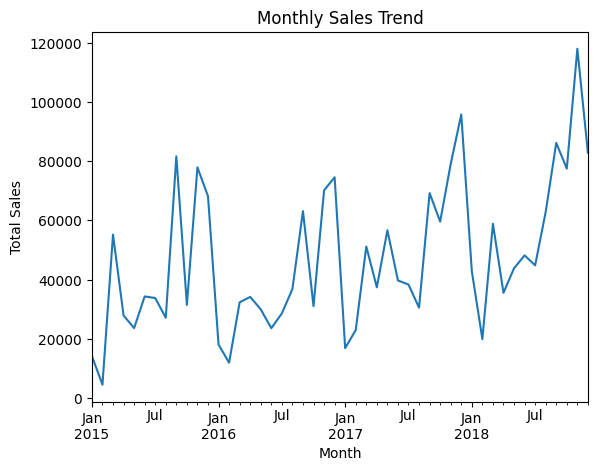

In [ ]:
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


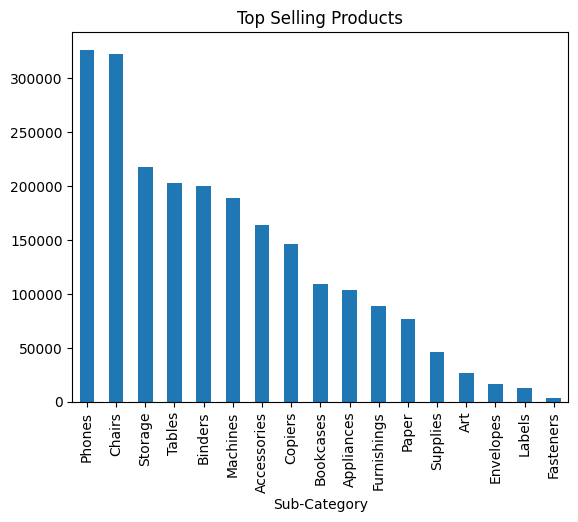

In [ ]:
top_products.plot(kind='bar', title='Top Selling Products')
plt.show()


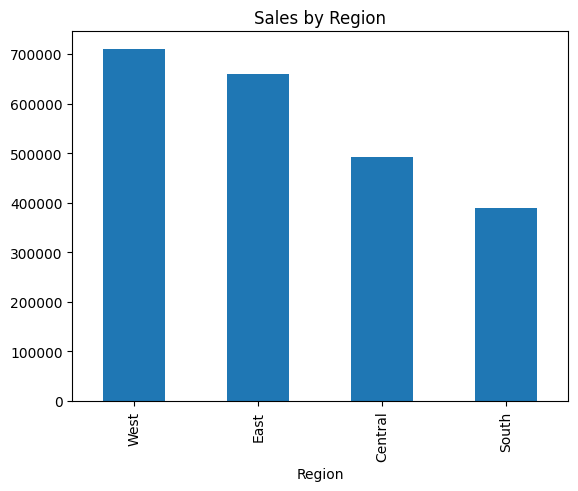

In [ ]:
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()


In [ ]:
df.to_excel("cleaned_superstore_sales.xlsx", index=False)
files.download("cleaned_superstore_sales.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Key Insights

- Monthly sales show clear variations, indicating seasonal demand patterns.
- Certain product sub-categories consistently generate higher revenue than others.
- One or two regions contribute the majority of total sales.
- Focusing on top-performing products and regions can significantly improve revenue.


## Conclusion

This project demonstrates how raw sales data can be transformed into meaningful business insights using Python and Excel.  
By cleaning the data, analyzing trends, and visualizing results, valuable insights were extracted to support decision-making.

The approach used in this project can be applied to real-world business datasets for reporting and performance analysis.

